In [83]:
from zipfile import ZipFile
import os

zip_path = '/content/att_faces.zip'

destination_dir = '/content/images/'

os.makedirs(destination_dir, exist_ok=True)

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

print("Unzipped to:", destination_dir)

Unzipped to: /content/images/


In [84]:
import cv2
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

Length of the folders: 40


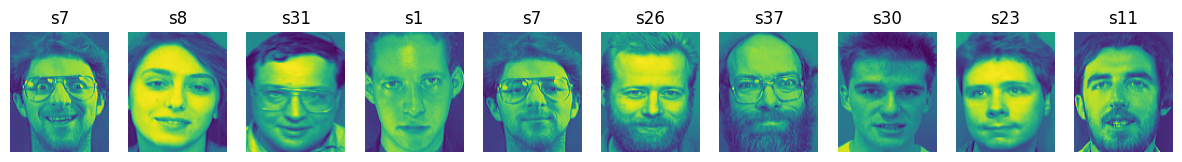

In [169]:
folders = os.listdir(destination_dir)
folders.remove(".ipynb_checkpoints")
print(f"Length of the folders: {len(folders)}")

fig, axes = plt.subplots(1,10,figsize=(15,5))

for i in range(10):
  random_folder_pick = random.choice(folders)
  random_image = random.choice(list(range(1,11)))
  img_path = os.path.join(destination_dir,random_folder_pick,str(random_image)+".pgm")
  image = Image.open(img_path)
  axes[i].imshow(image)
  axes[i].axis("off")
  axes[i].set_title(random_folder_pick)

In [242]:
import torch
from torch.utils.data import Dataset,DataLoader
import numpy as np
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim

In [168]:
manual_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [88]:
class CustomDatasets(Dataset):
  def __init__(self,data_path,transform=None):
    self.data_path = data_path
    self.transform = transform
    self.image_paths = []
    self.labels = []
    folders = os.listdir(data_path)
    folders.remove('.ipynb_checkpoints')
    self.labels = folders


In [91]:
fold = os.listdir(destination_dir)
labels = []
images = []
for i in (fold):
  labels.append(i)
  folder_path = os.path.join(destination_dir,i)
  for j in os.listdir(folder_path):
    image_path = os.path.join(folder_path,j)
    images.append(image_path)


In [92]:
labels = []


In [93]:
for i in images:
  labels.append(i.split('/')[-2])


In [94]:
labels =  set(labels)
labels = list(labels)
labels

['s38',
 's12',
 's37',
 's6',
 's27',
 's14',
 's26',
 's40',
 's9',
 's4',
 's19',
 's7',
 's8',
 's34',
 's30',
 's15',
 's5',
 's16',
 's18',
 's3',
 's33',
 's25',
 's32',
 's22',
 's13',
 's28',
 's2',
 's24',
 's20',
 's29',
 's1',
 's35',
 's10',
 's21',
 's17',
 's11',
 's23',
 's39',
 's31',
 's36']

In [154]:
class FaceDataset(Dataset):
    def __init__(self, data_path, transform=None):
        self.data_path = data_path
        self.transform = transform
        self.image_paths = []
        self.labels = []

        folders = os.listdir(data_path)
        self.label_names = folders
        self.label_names.remove(".ipynb_checkpoints")
        for label_index, folder in enumerate(folders):
            folder_path = os.path.join(data_path, folder)
            images_in_folder = os.listdir(folder_path)
            for image_name in images_in_folder:
                self.image_paths.append(os.path.join(folder_path, image_name))
                self.labels.append(label_index)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        img_path = self.image_paths[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (92, 112))

        if self.transform:
            img = self.transform(img)

        return img, self.labels[idx]


In [287]:
data_path = "/content/images/"
dataset = FaceDataset(data_path, transform=manual_transformations)
dataset[10]

(tensor([[[-0.6392, -0.6078, -0.6471,  ..., -0.7020, -0.6549, -0.6863],
          [-0.6157, -0.6471, -0.6000,  ..., -0.6863, -0.6706, -0.6863],
          [-0.6078, -0.6078, -0.6157,  ..., -0.6706, -0.6627, -0.6863],
          ...,
          [ 0.4745,  0.3020,  0.4745,  ...,  0.0745,  0.0039,  0.2000],
          [ 0.1608,  0.1922,  0.7255,  ...,  0.0039,  0.0588, -0.1216],
          [-0.0118,  0.5451,  0.4745,  ...,  0.0667,  0.1294, -0.2314]]]),
 1)

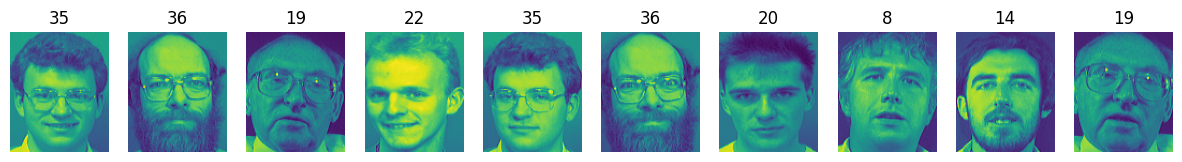

In [286]:

fig,ax = plt.subplots(1,10,figsize=(15,10))
for i in range(0,10):
  j = random.choice(list(range(0,400)))

  ax[i].imshow(dataset[j][0].squeeze(0))
  ax[i].set_title(dataset[j][1])
  ax[i].axis("off")



In [157]:
train_dataset = []
test_dataset = []

In [158]:
print(dataset.label_names)

['s20', 's14', 's2', 's9', 's17', 's7', 's27', 's26', 's15', 's31', 's25', 's38', 's40', 's4', 's11', 's12', 's1', 's29', 's18', 's34', 's30', 's39', 's5', 's23', 's16', 's32', 's33', 's35', 's13', 's24', 's10', 's36', 's28', 's8', 's22', 's6', 's37', 's21', 's19', 's3']


In [172]:
for label_name in dataset.label_names:
    folder_path = os.path.join(data_path, label_name)
    image_paths = os.listdir(folder_path)
    random.shuffle(image_paths)

    training_images = image_paths[:8]
    testing_images = image_paths[8:10]

    for img in training_images:
        img_path = os.path.join(folder_path, img)
        idx = dataset.image_paths.index(img_path)
        train_dataset.append(dataset[idx])

    for img in testing_images:
        img_path = os.path.join(folder_path, img)
        idx = dataset.image_paths.index(img_path)
        test_dataset.append(dataset[idx])

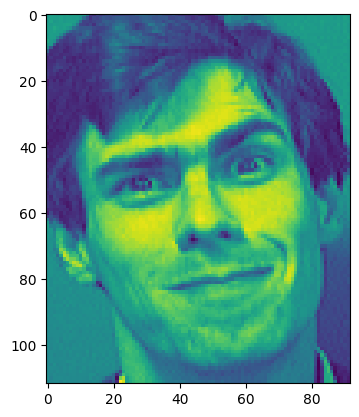

In [178]:
plt.imshow(train_dataset[0][0].squeeze(0))

320

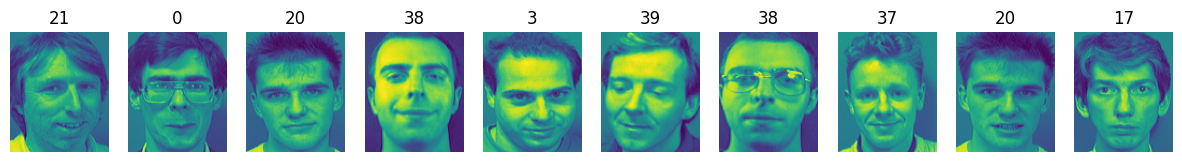

In [234]:
fig,ax = plt.subplots(1,10,figsize=(15,5))
for i in range(0,10):
  j = random.choice(list(range(0,320)))

  ax[i].imshow(train_dataset[j][0].squeeze(0))
  ax[i].set_title(train_dataset[j][1])
  ax[i].axis("off")
len(train_dataset)

320

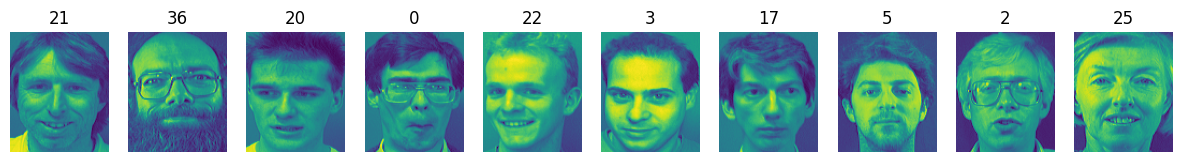

In [235]:
fig,ax = plt.subplots(1,10,figsize=(15,5))
for i in range(0,10):
  j = random.choice(list(range(0,80)))

  ax[i].imshow(test_dataset[j][0].squeeze(0))
  ax[i].set_title(test_dataset[j][1])
  ax[i].axis("off")
len(train_dataset)

In [237]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Training DataLoader
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [250]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 11 * 14, 128)
        self.fc2 = nn.Linear(128, 40)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 64 * 11 * 14)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


Epoch 1/10: Loss = 3.6947, Test Accuracy = 2.50%
Epoch 2/10: Loss = 3.6518, Test Accuracy = 12.50%
Epoch 3/10: Loss = 3.4142, Test Accuracy = 30.00%
Epoch 4/10: Loss = 2.7617, Test Accuracy = 50.00%
Epoch 5/10: Loss = 2.1034, Test Accuracy = 73.75%
Epoch 6/10: Loss = 1.5165, Test Accuracy = 90.00%
Epoch 7/10: Loss = 1.1064, Test Accuracy = 85.00%
Epoch 8/10: Loss = 0.9492, Test Accuracy = 96.25%
Epoch 9/10: Loss = 0.7655, Test Accuracy = 93.75%
Epoch 10/10: Loss = 0.6689, Test Accuracy = 96.25%


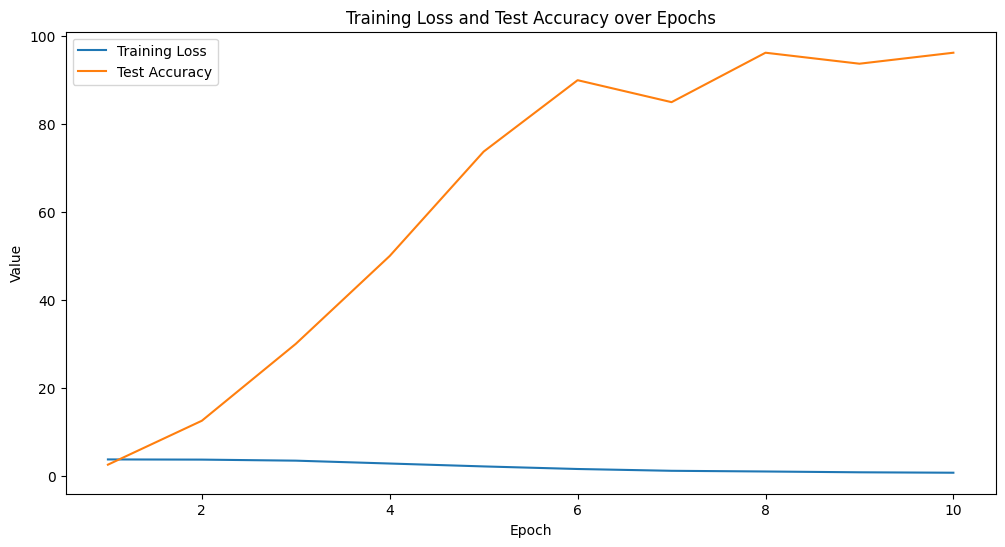

In [251]:

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total  # Calculate accuracy
    test_accuracies.append(accuracy)  # Store accuracy

    print(f"Epoch {epoch + 1}/{num_epochs}: Loss = {running_loss / len(train_loader):.4f}, Test Accuracy = {accuracy:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Training Loss and Test Accuracy over Epochs")
plt.legend()
plt.show()


In [283]:
## Testing the sample test data

img, label = test_dataset[0]

def testing_images(data):
  img, label = data
  img_m = img.unsqueeze(0)
  img1 = img.squeeze(0)
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  with torch.no_grad():
    pred_img = model(img_m)
  ax[0].imshow(img1)
  ax[0].set_title(label)
  ax[0].axis('off')
  ax[1].imshow(img1)
  ax[1].set_title(torch.max(pred_img,1)[1])
  ax[1].axis('off')



In [284]:
img.unsqueeze(0).shape

torch.Size([1, 1, 112, 92])

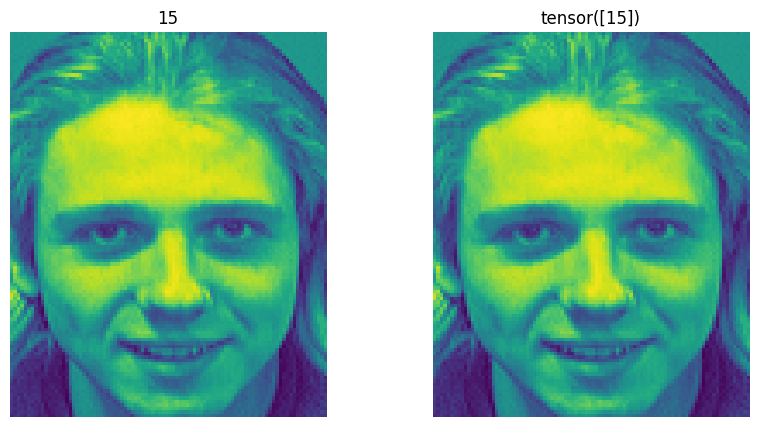

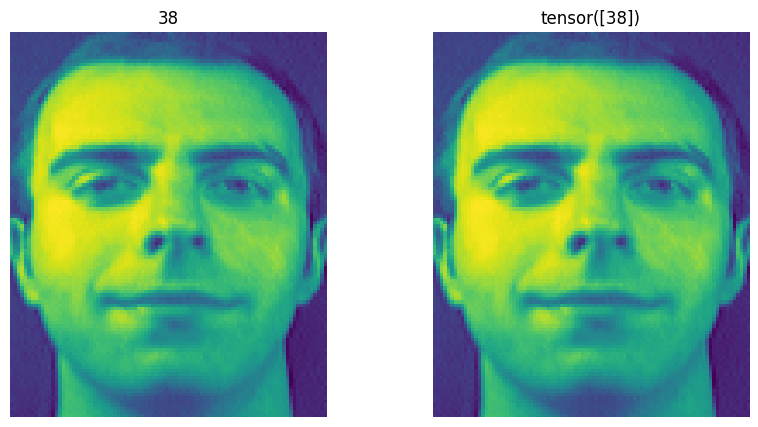

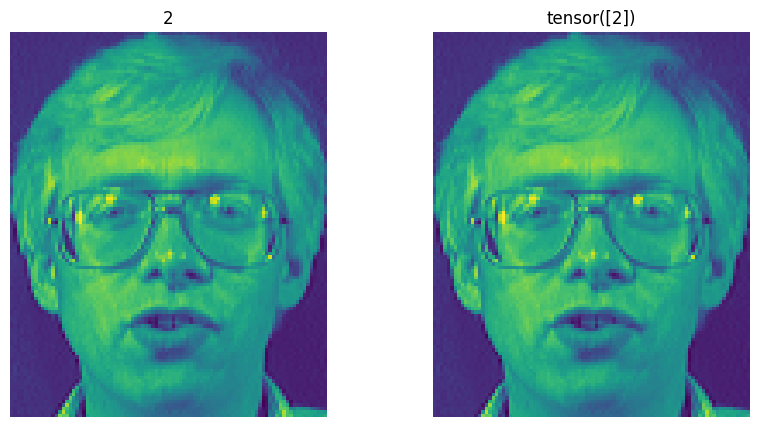

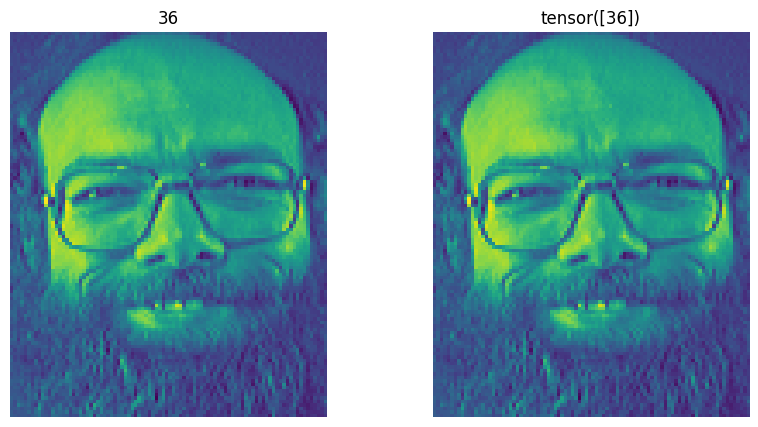

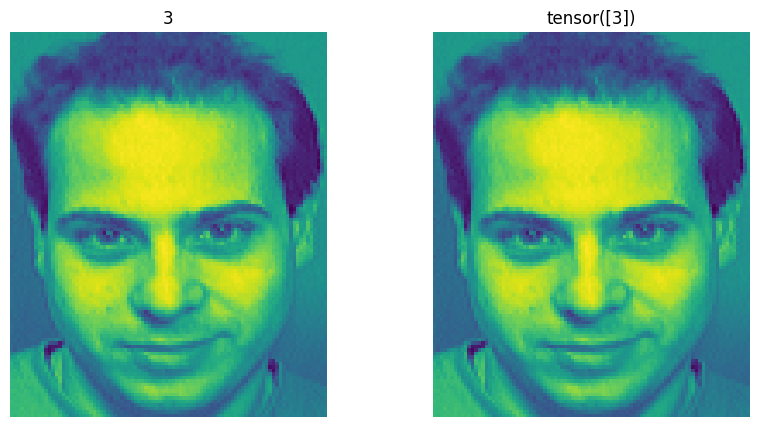

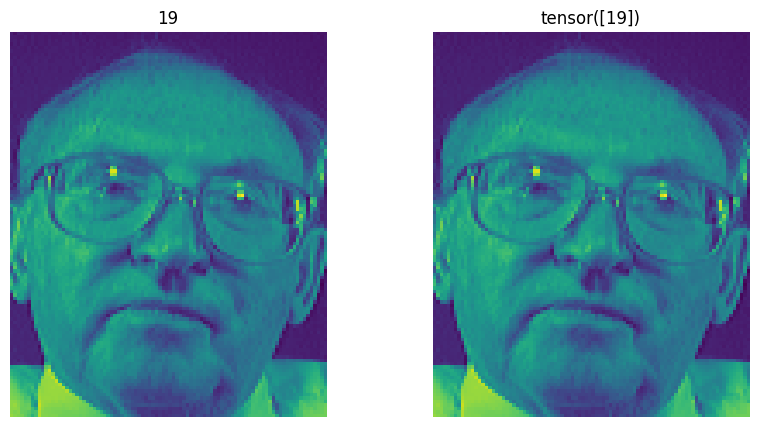

In [285]:
testing_images(test_dataset[30])

for i in range(5):
  random_choice = random.choice(list(range(0,80)))
  testing_images(test_dataset[random_choice])

In [290]:
!pip install torch cam
from cam import CAM

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

ImportError: cannot import name 'CAM' from 'cam' (/usr/local/lib/python3.10/dist-packages/cam/__init__.py)

In [294]:
from torchcam.methods import GradCAM